# Fake News Detection

Will built a machine learning model using Term Frequency Inverse-Document Frequency Vectorizer (TFIDFVectorizer) and passive aggressive classifier to classify fake news and real news.


The dataset is available at [fake news data](https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view)

In [41]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


warnings.filterwarnings('ignore')

In [26]:
# import dataset
data = pd.read_csv('news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


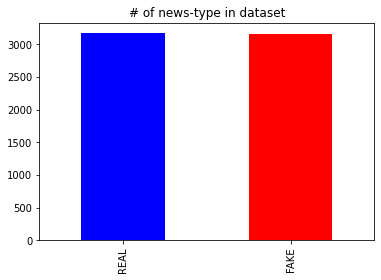

In [44]:
# label count

data.label.value_counts().plot(kind='bar', color=['b','r'])
plt.title("# of news-type in dataset");

In [28]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [37]:
data.duplicated().any()

False

- There are four columns with 6335 rows. 

- No missing values and duplicated values are detected.

- The unnamed column and title column are unnecessary for Machine Learning.

In [29]:
data.title[0]

'You Can Smell Hillary’s Fear'

In [30]:
data.text[0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

## Machine Learning

### Split dataset

In [31]:
feature, target = data['text'], data['label']


X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0, shuffle=True)

X_train.shape, X_test.shape

((5068,), (1267,))

In [32]:
# initial a TfidfVectorizer with maximum document frequency of 0.7
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

### Classifier Model

In [33]:
# initialize a passive aggressive classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

In [34]:
y_pred = pac.predict(tfidf_test)

prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

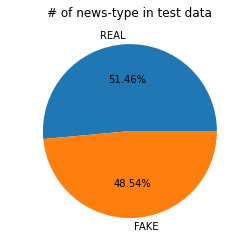

In [46]:
prediction.actual.value_counts().plot(kind='pie', autopct="%.2f%%")
plt.ylabel(" ")
plt.title("# of news-type in test data");

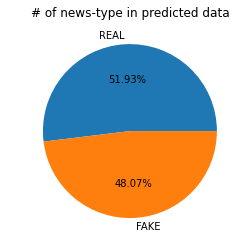

In [48]:
prediction.predicted.value_counts().plot(kind='pie', autopct="%.2f%%")
plt.ylabel(" ")
plt.title("# of news-type in predicted data");

- A few false real news were predicted.

In [35]:
print("Train score: {:.2f}".format(pac.score(tfidf_train, y_train)))
print("Test score: {:.2f}".format(pac.score(tfidf_test, y_test)))
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Train score: 1.00
Test score: 0.93
Accuracy score: 0.93


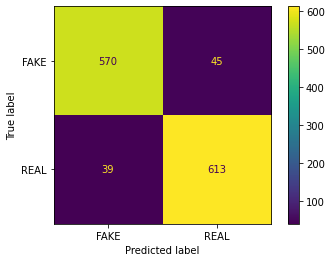

In [49]:
plot_confusion_matrix(pac, tfidf_test, y_test);

- Over all model performance is good.

**Reference**

- [Data Flair](https://data-flair.training/)